# About Dataset
#### This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

# Business Objective
#### Fruit Classification: Develop a classification model to categorize fruits based on their features.
#### Quality Prediction: Build a model to predict the quality rating of fruits using various attributes.

# Import Dependecies

In [1]:
import os
import sys
import warnings

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

# Load Dataset

In [2]:
pwd

'C:\\Users\\avina\\OneDrive\\Desktop\\Projects'

In [3]:
df = pd.read_csv('C:\\Users\\avina\\OneDrive\\Desktop\\Projects\\apple_quality.csv')

In [4]:
df.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [5]:
df.tail()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN

In [6]:
df.drop("A_id", axis=1, inplace = True)

In [7]:
df.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [8]:
df.tail()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN

In [9]:
df.shape

(4001, 8)

In [10]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

### Note:- From above analysis, we come on this conclusion that we have missing values in dataset, so we will need Mode or Median Imputation for filling missing values.

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


### Note:- In this data we have 8 features , in which 6 are Numerical values and 2 are Categorical values.

In [14]:
df.describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.503015    -0.989547    -0.470479     0.985478     0.512118   
std       1.928059     1.602507     1.943441     1.402757     1.930286   
min      -7.151703    -7.149848    -6.894485    -6.055058    -5.961897   
25%      -1.816765    -2.011770    -1.738425     0.062764    -0.801286   
50%      -0.513703    -0.984736    -0.504758     0.998249     0.534219   
75%       0.805526     0.030976     0.801922     1.894234     1.835976   
max       6.406367     5.790714     6.374916     7.619852     7.364403   

          Ripeness  
count  4000.000000  
mean      0.498277  
std       1.874427  
min      -5.864599  
25%      -0.771677  
50%       0.503445  
75%       1.766212  
max       7.237837

In [15]:
df.corr()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000

In [16]:
df["Quality"].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [17]:
df["Acidity"].value_counts()

-0.491590483                         1
0.416518576                          1
1.223084441                          1
2.190636353                          1
5.125138503                          1
                                    ..
-0.08899782                          1
-0.3815496                           1
4.67363368                           1
-0.76858734                          1
Created_by_Nidula_Elgiriyewithana    1
Name: Acidity, Length: 4001, dtype: int64

# EDA(Exploratory Data Analysis)
## Data Visualization

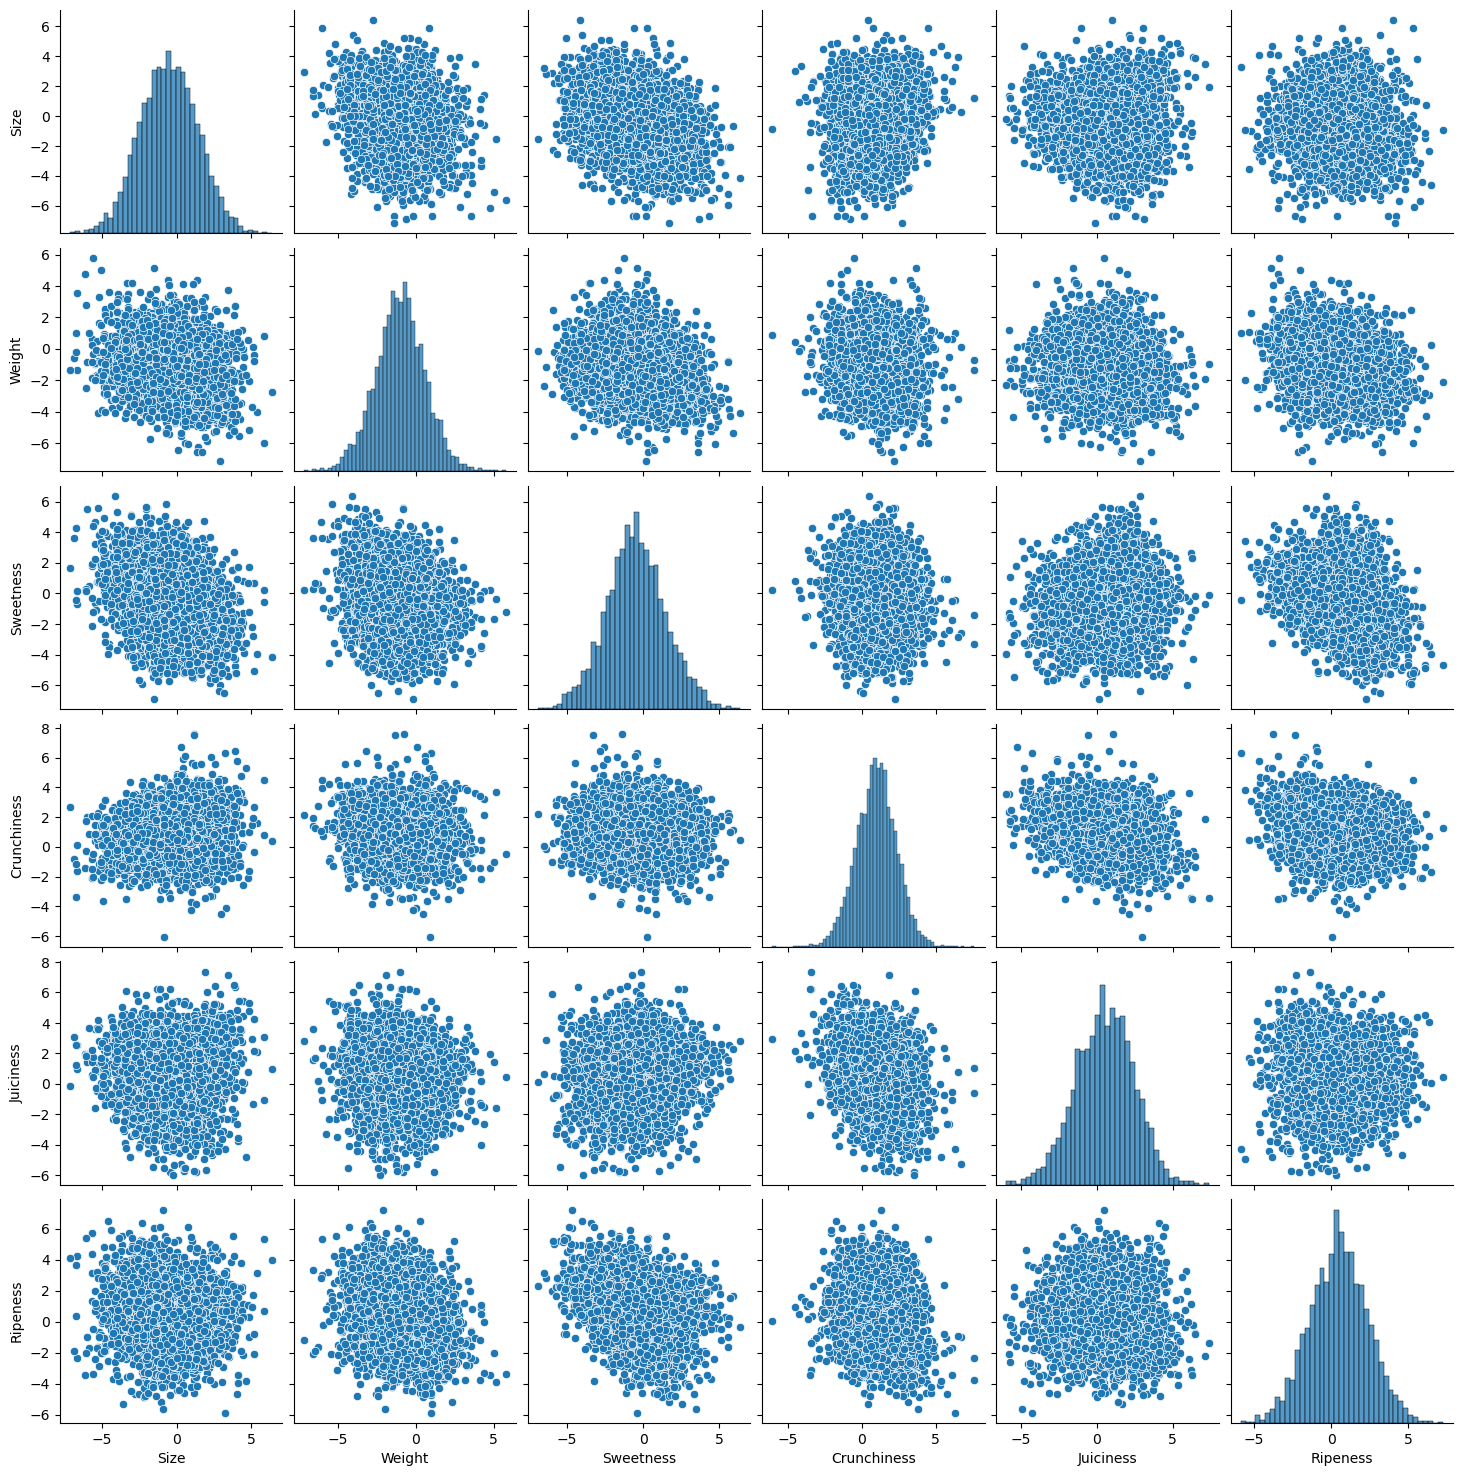

In [18]:
sns.pairplot(df)

In [19]:
fig = px.scatter(df,x = "Size",y = "Weight")
fig.show()

In [20]:
fig = px.scatter(df,x = "Size",y = "Juiciness")
fig.show()

<Axes: >

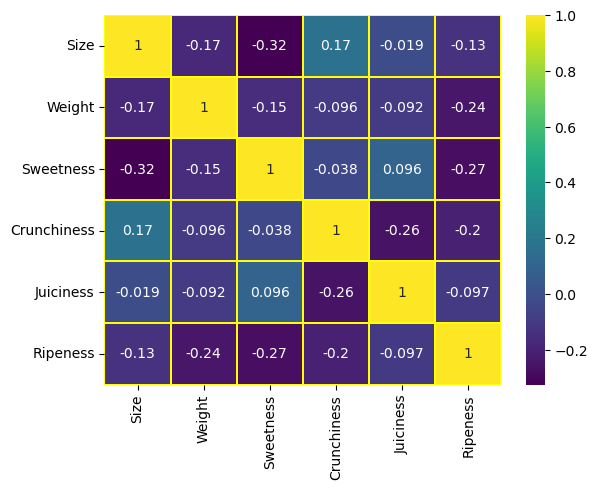

In [21]:
sns.heatmap(df.corr(), annot=True, linecolor="yellow", linewidths=0.01, cmap = "viridis")

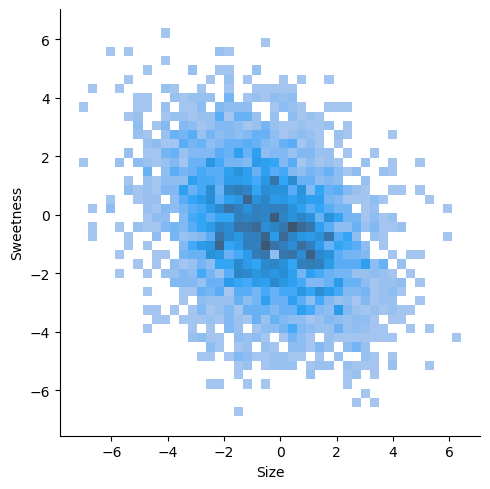

In [22]:
sns.displot(x="Size", y = "Sweetness", data = df,palette="Set1")

<Axes: xlabel='Quality', ylabel='Size'>

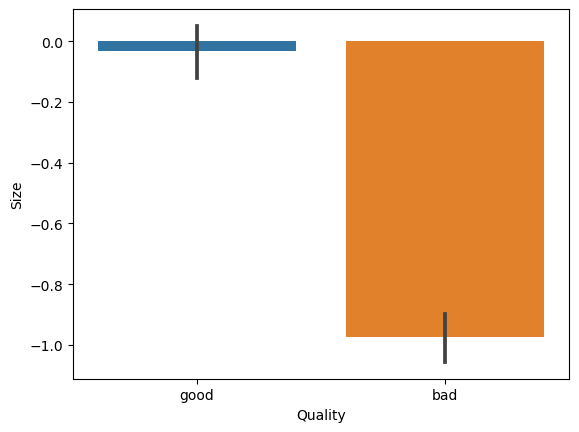

In [23]:
sns.barplot(x='Quality',y='Size',data=df)

<Axes: xlabel='Quality', ylabel='Sweetness'>

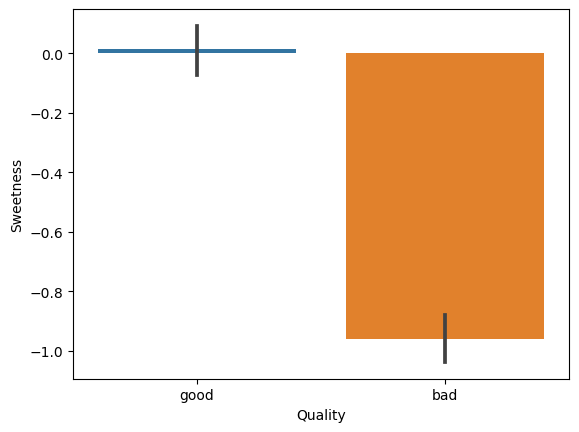

In [24]:
sns.barplot(x='Quality',y='Sweetness',data=df)

<Axes: xlabel='Quality', ylabel='count'>

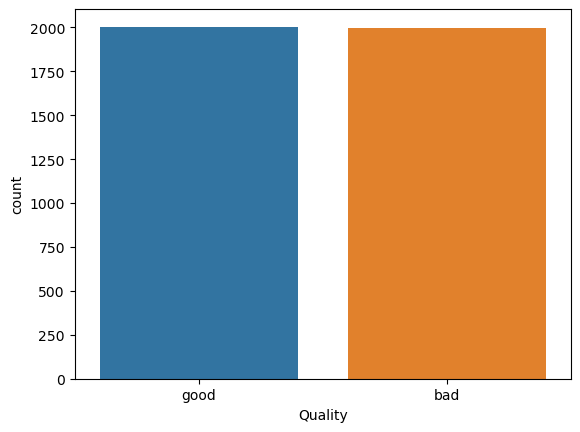

In [25]:
sns.countplot(x='Quality',data=df)

<Axes: xlabel='Quality', ylabel='Sweetness'>

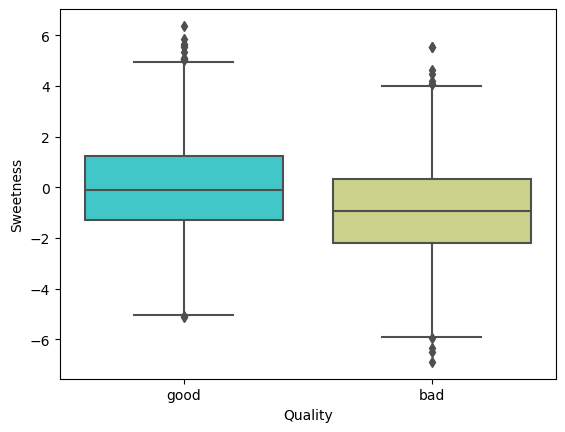

In [26]:
sns.boxplot(x="Quality", y="Sweetness", data=df,palette='rainbow')

<Axes: xlabel='Quality', ylabel='Size'>

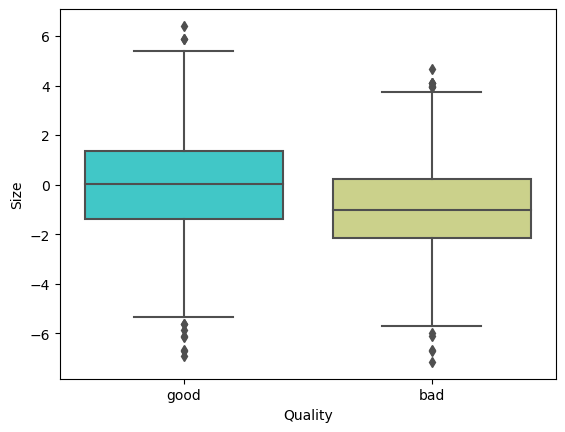

In [27]:
sns.boxplot(x="Quality", y="Size", data=df,palette='rainbow')

<Axes: xlabel='Quality', ylabel='Weight'>

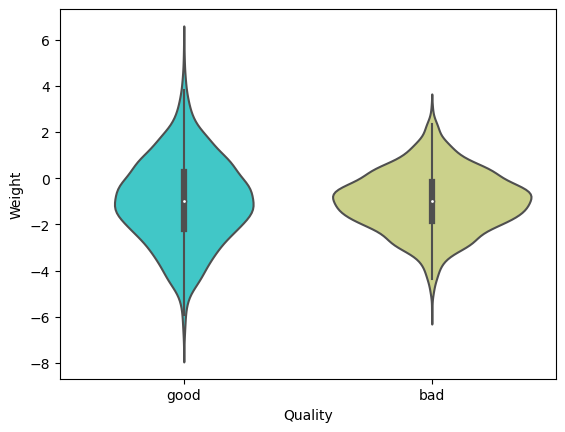

In [28]:
sns.violinplot(x="Quality", y="Weight", data=df,palette='rainbow')

<Axes: xlabel='Quality', ylabel='Ripeness'>

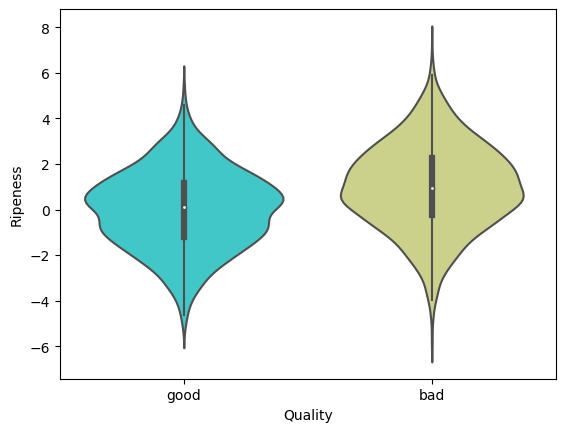

In [29]:
sns.violinplot(x="Quality", y="Ripeness", data=df,palette='rainbow')

<Axes: xlabel='Quality', ylabel='Crunchiness'>

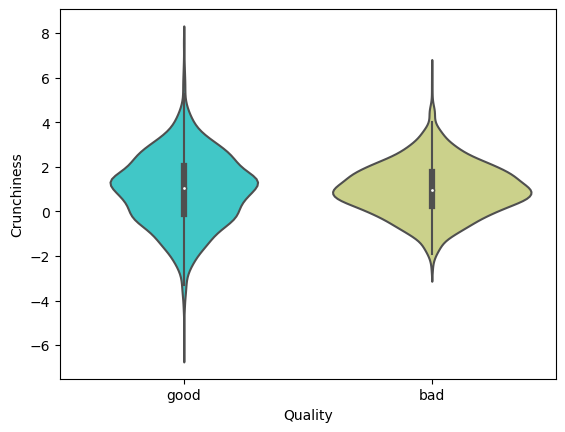

In [30]:
sns.violinplot(x="Quality", y="Crunchiness", data=df,palette='rainbow')

## Data pre - processing

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Quality_label"] = le.fit_transform(df["Quality"])

In [32]:
df.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  Quality_label  
0  -0.491590483    good              1  
1  -0.722809367    good              1  
2   2.621636473     bad              0  
3   0.790723217    good              1  
4   0.501984036    good              1

In [33]:
df.drop(columns=["Size", "Weight","Acidity","Quality"],inplace=True)

In [34]:
df.head()

Sweetness  Crunchiness  Juiciness  Ripeness  Quality_label
0   5.346330    -1.012009   1.844900  0.329840              1
1   3.664059     1.588232   0.853286  0.867530              1
2  -1.738429    -0.342616   2.838636 -0.038033              0
3   1.324874    -0.097875   3.637970 -3.413761              1
4  -0.384658    -0.553006   3.030874 -1.303849              1

In [35]:
df.tail()

Sweetness  Crunchiness  Juiciness  Ripeness  Quality_label
3996  -0.204020    -0.640196   0.024523 -1.087900              1
3997  -2.440461     0.657223   2.199709  4.763859              0
3998   2.366397    -0.200329   2.161435  0.214488              1
3999   0.121217    -1.154075   1.266677 -0.776571              1
4000        NaN          NaN        NaN       NaN              2

In [36]:
import pandas as pd

# Assuming df is your DataFrame
df = df.drop(df.index[-1])

# If you want to modify the DataFrame in-place, you can use the inplace parameter:
# df.drop(df.index[-1], inplace=True)

df

Sweetness  Crunchiness  Juiciness  Ripeness  Quality_label
0      5.346330    -1.012009   1.844900  0.329840              1
1      3.664059     1.588232   0.853286  0.867530              1
2     -1.738429    -0.342616   2.838636 -0.038033              0
3      1.324874    -0.097875   3.637970 -3.413761              1
4     -0.384658    -0.553006   3.030874 -1.303849              1
...         ...          ...        ...       ...            ...
3995  -3.714549     0.473052   1.697986  2.244055              0
3996  -0.204020    -0.640196   0.024523 -1.087900              1
3997  -2.440461     0.657223   2.199709  4.763859              0
3998   2.366397    -0.200329   2.161435  0.214488              1
3999   0.121217    -1.154075   1.266677 -0.776571              1

[4000 rows x 5 columns]

## Spliting Data into Training set and Test set

In [37]:
X = df[["Sweetness","Crunchiness","Juiciness","Ripeness"]].values
y = df["Quality_label"].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

#### Scaling Training Dataset

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

# Model Building

## ANN

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [42]:
X_train.shape

(3000, 4)

In [43]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

# Training Model

In [44]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
94/94 [==============================] - 2s 6ms/step - loss: 0.5815 - val_loss: 0.5337
Epoch 2/600
94/94 [==============================] - 0s 3ms/step - loss: 0.5248 - val_loss: 0.5023
Epoch 3/600
94/94 [==============================] - 0s 4ms/step - loss: 0.5047 - val_loss: 0.4923
Epoch 4/600
94/94 [==============================] - 1s 7ms/step - loss: 0.4940 - val_loss: 0.4830
Epoch 5/600
94/94 [==============================] - 1s 7ms/step - loss: 0.4864 - val_loss: 0.4710
Epoch 6/600
94/94 [==============================] - 1s 9ms/step - loss: 0.4801 - val_loss: 0.4641
Epoch 7/600
94/94 [==============================] - 1s 8ms/step - loss: 0.4731 - val_loss: 0.4588
Epoch 8/600
94/94 [==============================] - 1s 8ms/step - loss: 0.4673 - val_loss: 0.4547
Epoch 9/600
94/94 [==============================] - 1s 8ms/step - loss: 0.4617 - val_loss: 0.4517
Epoch 10/600
94/94 [==============================] - 1s 8ms/step - loss: 0.4584 - val_loss: 0.4491
Epoch 11/

94/94 [==============================] - 1s 5ms/step - loss: 0.3970 - val_loss: 0.4269
Epoch 84/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3979 - val_loss: 0.4272
Epoch 85/600
94/94 [==============================] - 0s 2ms/step - loss: 0.3985 - val_loss: 0.4317
Epoch 86/600
94/94 [==============================] - 0s 2ms/step - loss: 0.3976 - val_loss: 0.4254
Epoch 87/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3971 - val_loss: 0.4276
Epoch 88/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3958 - val_loss: 0.4230
Epoch 89/600
94/94 [==============================] - 0s 4ms/step - loss: 0.3971 - val_loss: 0.4263
Epoch 90/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3968 - val_loss: 0.4312
Epoch 91/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3966 - val_loss: 0.4248
Epoch 92/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3971 - val_loss: 0.4377
Epoch 93/600


94/94 [==============================] - 0s 4ms/step - loss: 0.3865 - val_loss: 0.4312
Epoch 165/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3856 - val_loss: 0.4281
Epoch 166/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3859 - val_loss: 0.4296
Epoch 167/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3856 - val_loss: 0.4246
Epoch 168/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3871 - val_loss: 0.4307
Epoch 169/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3871 - val_loss: 0.4256
Epoch 170/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3853 - val_loss: 0.4264
Epoch 171/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3849 - val_loss: 0.4277
Epoch 172/600
94/94 [==============================] - 0s 4ms/step - loss: 0.3854 - val_loss: 0.4284
Epoch 173/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3862 - val_loss: 0.4260
Epoc

94/94 [==============================] - 1s 7ms/step - loss: 0.3794 - val_loss: 0.4346
Epoch 246/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3786 - val_loss: 0.4343
Epoch 247/600
94/94 [==============================] - 1s 8ms/step - loss: 0.3779 - val_loss: 0.4306
Epoch 248/600
94/94 [==============================] - 1s 8ms/step - loss: 0.3772 - val_loss: 0.4338
Epoch 249/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3797 - val_loss: 0.4345
Epoch 250/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3794 - val_loss: 0.4402
Epoch 251/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3772 - val_loss: 0.4321
Epoch 252/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3775 - val_loss: 0.4357
Epoch 253/600
94/94 [==============================] - 1s 8ms/step - loss: 0.3771 - val_loss: 0.4353
Epoch 254/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3768 - val_loss: 0.4377
Epoc

94/94 [==============================] - 0s 5ms/step - loss: 0.3721 - val_loss: 0.4409
Epoch 327/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3719 - val_loss: 0.4351
Epoch 328/600
94/94 [==============================] - 0s 4ms/step - loss: 0.3697 - val_loss: 0.4417
Epoch 329/600
94/94 [==============================] - 0s 4ms/step - loss: 0.3723 - val_loss: 0.4414
Epoch 330/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3716 - val_loss: 0.4374
Epoch 331/600
94/94 [==============================] - 1s 9ms/step - loss: 0.3697 - val_loss: 0.4379
Epoch 332/600
94/94 [==============================] - 1s 8ms/step - loss: 0.3725 - val_loss: 0.4458
Epoch 333/600
94/94 [==============================] - 1s 8ms/step - loss: 0.3720 - val_loss: 0.4362
Epoch 334/600
94/94 [==============================] - 1s 8ms/step - loss: 0.3718 - val_loss: 0.4417
Epoch 335/600
94/94 [==============================] - 1s 8ms/step - loss: 0.3721 - val_loss: 0.4408
Epoc

94/94 [==============================] - 0s 4ms/step - loss: 0.3647 - val_loss: 0.4498
Epoch 408/600
94/94 [==============================] - 0s 4ms/step - loss: 0.3671 - val_loss: 0.4513
Epoch 409/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3680 - val_loss: 0.4421
Epoch 410/600
94/94 [==============================] - 0s 4ms/step - loss: 0.3649 - val_loss: 0.4471
Epoch 411/600
94/94 [==============================] - 1s 8ms/step - loss: 0.3646 - val_loss: 0.4384
Epoch 412/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3650 - val_loss: 0.4431
Epoch 413/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3662 - val_loss: 0.4420
Epoch 414/600
94/94 [==============================] - 0s 2ms/step - loss: 0.3639 - val_loss: 0.4441
Epoch 415/600
94/94 [==============================] - 0s 3ms/step - loss: 0.3656 - val_loss: 0.4678
Epoch 416/600
94/94 [==============================] - 0s 4ms/step - loss: 0.3672 - val_loss: 0.4513
Epoc

94/94 [==============================] - 1s 7ms/step - loss: 0.3608 - val_loss: 0.4432
Epoch 489/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3613 - val_loss: 0.4550
Epoch 490/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3600 - val_loss: 0.4551
Epoch 491/600
94/94 [==============================] - 1s 5ms/step - loss: 0.3590 - val_loss: 0.4505
Epoch 492/600
94/94 [==============================] - 0s 5ms/step - loss: 0.3614 - val_loss: 0.4571
Epoch 493/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3613 - val_loss: 0.4524
Epoch 494/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3602 - val_loss: 0.4545
Epoch 495/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3613 - val_loss: 0.4535
Epoch 496/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3604 - val_loss: 0.4428
Epoch 497/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3614 - val_loss: 0.4597
Epoc

94/94 [==============================] - 0s 3ms/step - loss: 0.3566 - val_loss: 0.4540
Epoch 570/600
94/94 [==============================] - 0s 5ms/step - loss: 0.3567 - val_loss: 0.4570
Epoch 571/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3574 - val_loss: 0.4599
Epoch 572/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3569 - val_loss: 0.4511
Epoch 573/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3571 - val_loss: 0.4660
Epoch 574/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3565 - val_loss: 0.4595
Epoch 575/600
94/94 [==============================] - 0s 4ms/step - loss: 0.3558 - val_loss: 0.4536
Epoch 576/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3547 - val_loss: 0.4653
Epoch 577/600
94/94 [==============================] - 1s 6ms/step - loss: 0.3562 - val_loss: 0.4556
Epoch 578/600
94/94 [==============================] - 1s 7ms/step - loss: 0.3568 - val_loss: 0.4532
Epoc

In [45]:
model_loss = pd.DataFrame(model.history.history)

In [46]:
model_loss

loss  val_loss
0    0.581534  0.533710
1    0.524755  0.502302
2    0.504724  0.492277
3    0.494031  0.483034
4    0.486404  0.471048
..        ...       ...
595  0.354752  0.452525
596  0.355772  0.466332
597  0.356724  0.458127
598  0.355910  0.462512
599  0.357348  0.465306

[600 rows x 2 columns]

<Axes: >

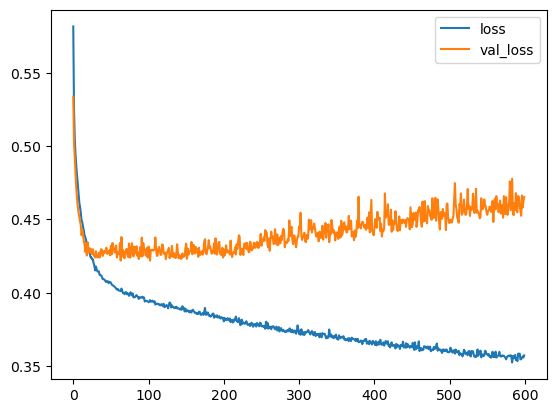

In [47]:
model_loss.plot()

In [48]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [51]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
94/94 [==============================] - 1s 4ms/step - loss: 0.6069 - val_loss: 0.5547
Epoch 2/600
94/94 [==============================] - 0s 4ms/step - loss: 0.5434 - val_loss: 0.5205
Epoch 3/600
94/94 [==============================] - 0s 3ms/step - loss: 0.5133 - val_loss: 0.5011
Epoch 4/600
94/94 [==============================] - 0s 3ms/step - loss: 0.4954 - val_loss: 0.4899
Epoch 5/600
94/94 [==============================] - 0s 3ms/step - loss: 0.4833 - val_loss: 0.4736
Epoch 6/600
94/94 [==============================] - 0s 3ms/step - loss: 0.4736 - val_loss: 0.4647
Epoch 7/600
94/94 [==============================] - 0s 3ms/step - loss: 0.4674 - val_loss: 0.4571
Epoch 8/600
94/94 [==============================] - 0s 3ms/step - loss: 0.4621 - val_loss: 0.4528
Epoch 9/600
94/94 [==============================] - 0s 3ms/step - loss: 0.4550 - val_loss: 0.4503
Epoch 10/600
94/94 [==============================] - 0s 4ms/step - loss: 0.4534 - val_loss: 0.4447
Epoch 11/

<Axes: >

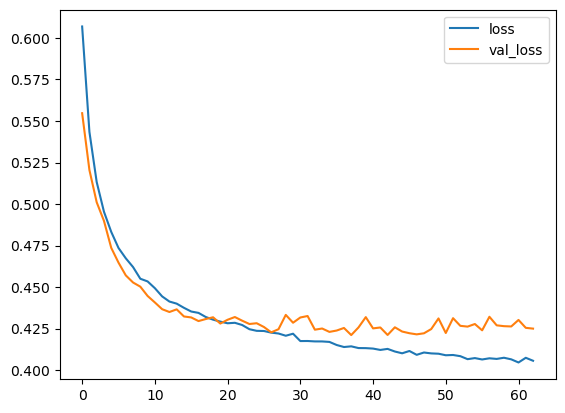

In [52]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [53]:
from tensorflow.keras.layers import Dropout

In [54]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [55]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/600
94/94 [==============================] - 1s 5ms/step - loss: 0.8229 - val_loss: 0.6111
Epoch 2/600
94/94 [==============================] - 0s 5ms/step - loss: 0.6923 - val_loss: 0.5976
Epoch 3/600
94/94 [==============================] - 1s 8ms/step - loss: 0.6627 - val_loss: 0.5925
Epoch 4/600
94/94 [==============================] - 1s 8ms/step - loss: 0.6442 - val_loss: 0.5854
Epoch 5/600
94/94 [==============================] - 1s 8ms/step - loss: 0.6281 - val_loss: 0.5835
Epoch 6/600
94/94 [==============================] - 0s 5ms/step - loss: 0.6186 - val_loss: 0.5735
Epoch 7/600
94/94 [==============================] - 0s 3ms/step - loss: 0.6126 - val_loss: 0.5696
Epoch 8/600
94/94 [==============================] - 0s 3ms/step - loss: 0.6068 - val_loss: 0.5649
Epoch 9/600
94/94 [==============================] - 0s 3ms/step - loss: 0.6024 - val_loss: 0.5575
Epoch 10/600
94/94 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.5540
Epoch 11/

Epoch 83/600
94/94 [==============================] - 0s 5ms/step - loss: 0.5109 - val_loss: 0.4679
Epoch 84/600
94/94 [==============================] - 1s 6ms/step - loss: 0.5169 - val_loss: 0.4681
Epoch 85/600
94/94 [==============================] - 1s 7ms/step - loss: 0.5007 - val_loss: 0.4684
Epoch 86/600
94/94 [==============================] - 1s 7ms/step - loss: 0.4996 - val_loss: 0.4638
Epoch 87/600
94/94 [==============================] - 1s 7ms/step - loss: 0.5120 - val_loss: 0.4640
Epoch 88/600
94/94 [==============================] - 1s 7ms/step - loss: 0.4997 - val_loss: 0.4624
Epoch 89/600
94/94 [==============================] - 1s 7ms/step - loss: 0.5131 - val_loss: 0.4668
Epoch 90/600
94/94 [==============================] - 1s 7ms/step - loss: 0.5048 - val_loss: 0.4654
Epoch 91/600
94/94 [==============================] - 0s 4ms/step - loss: 0.4982 - val_loss: 0.4629
Epoch 92/600
94/94 [==============================] - 0s 2ms/step - loss: 0.4963 - val_loss: 0.4608


<Axes: >

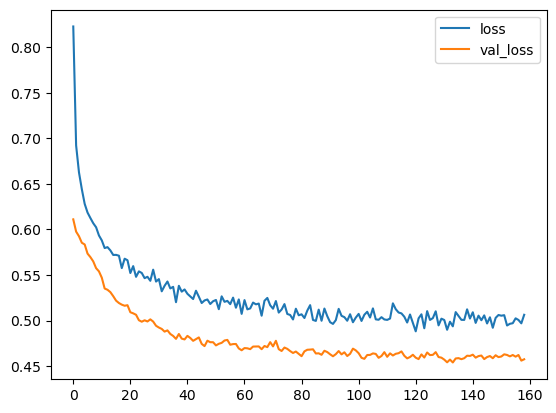

In [57]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [59]:
import numpy as np
from keras.models import Sequential

# Assuming you have a Sequential model named 'model' and X_test as your test data
predictions = model.predict(X_test)

# Extract the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

32/32 [==============================] - 0s 1ms/step


In [60]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predicted_classes))
print(classification_report(y_test,predicted_classes))

[[506   0]
 [494   0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       506
           1       0.00      0.00      0.00       494

    accuracy                           0.51      1000
   macro avg       0.25      0.50      0.34      1000
weighted avg       0.26      0.51      0.34      1000



## Random Forest

In [63]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'X' with features and a Series 'y' with labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7775
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       401
           1       0.77      0.78      0.78       399

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800



## Decision Tree

In [64]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'X' with features and a Series 'y' with labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.71875
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       401
           1       0.72      0.72      0.72       399

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



## SVM

In [65]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'X' with features and a Series 'y' with labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.67875
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       401
           1       0.69      0.65      0.67       399

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800



## KNN

In [66]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'X' with features and a Series 'y' with labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7725
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       401
           1       0.77      0.77      0.77       399

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



## XGBOOST

In [67]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'X' with features and a Series 'y' with labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7725
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       401
           1       0.78      0.75      0.77       399

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



## Conclusion: From above analysis , it is clear that Random Forest working well and with accuracy of 78%.
### Thank you!